In [123]:
from sympy import *
from sympy.physics.mechanics import *
import math
init_vprinting()

In [124]:
h, r, pi = symbols("h r π")
q = r / h


func_a = (2-q)**3 - 4*(1-q)**3
func_b = (2-q)**3

volume = integrate(4*pi*r**2*func_a, (r, 0, h)) + integrate(4*pi*r**2*func_b, (r, h, 2*h))

simplify(volume)

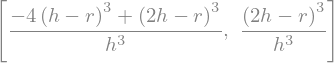

In [125]:
func = list(map(simplify, [func_a, func_b]))
func

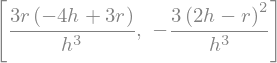

In [126]:
gradient_func = lambda x: simplify(diff(x, r))
gradient = list(map(gradient_func, func))
gradient

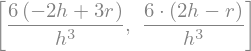

In [127]:
lacian_func = lambda func: simplify(diff(func, r))
lapcian = list(map(lacian_func, gradient))
lapcian

In [128]:
s = [(h, 1), (pi, math.pi)]

# Assume h == 1
a = [(2/10*i, (func_a/volume).subs([(r,2/10*i)]).subs(s)) for i in range(5)]
b = [(2/10*i+1, (func_b/volume).subs([(r,2/10*i+1)]).subs(s)) for i in range(5)]
print(a+b)

[(0.0, 0.318309886183791), (0.2, 0.301121152329866), (0.4, 0.257194388036503), (0.6000000000000001, 0.197988749206318), (0.8, 0.134963391741927), (1.0, 0.0795774715459477), (1.2, 0.0407436654315252), (1.4, 0.0171887338539247), (1.6, 0.00509295817894065), (1.8, 0.000636619772367581)]


In [129]:
s = [(h, 1), (pi, math.pi)]

# Assume h == 1
a = [(2/10*i, (gradient[0]/volume).subs([(r,2/10*i)]).subs(s)) for i in range(5)]
b = [(2/10*i+1, (gradient[1]/volume).subs([(r,2/10*i+1)]).subs(s)) for i in range(6)]
print(a+b)

[(0.0, 0), (0.2, -0.162338041953733), (0.4, -0.267380304394384), (0.6000000000000001, -0.315126787321953), (0.8, -0.305577490736439), (1.0, -0.238732414637843), (1.2, -0.152788745368220), (1.4, -0.0859436692696235), (1.6, -0.0381971863420549), (1.8, -0.00954929658551372), (2.0, 0)]


In [130]:
s = [(h, 1), (pi, math.pi)]

# Assume h == 1
a = [(2/10*i, (lapcian[0]/volume).subs([(r,2/10*i)]).subs(s)) for i in range(5)]
b = [(2/10*i+1, (lapcian[1]/volume).subs([(r,2/10*i+1)]).subs(s)) for i in range(6)]
print(a+b)

[(0.0, -0.954929658551372), (0.2, -0.668450760985960), (0.4, -0.381971863420549), (0.6000000000000001, -0.0954929658551371), (0.8, 0.190985931710275), (1.0, 0.477464829275686), (1.2, 0.381971863420549), (1.4, 0.286478897565412), (1.6, 0.190985931710274), (1.8, 0.0954929658551372), (2.0, 0)]


In [131]:
s = [(h,1), (pi, math.pi)]
vol =  volume.subs(s)
target = [ simplify(f/vol).subs(s) for f in func]

# plot((target[0], (r, 0, 1)), (target[1], (r, 1, 2)))
